In [1]:
#@title Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn packages
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#@title Define a function
def pcm(y,y_predict):
    from sklearn.metrics import confusion_matrix

    cm=confusion_matrix(y, y_predict)
    plt.figure(figsize=(16, 9))
    ax=plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, cmap='summer') #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])

transform=preprocessing.StandardScaler()
rs:int=42

In [3]:
#@title Load the dataset1
data1=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [4]:
#@title Load the dataset2
data2=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   Block                                90 non-null     float64
 4   ReusedCount                          90 non-null     float64
 5   Orbit_ES-L1                          90 non-null     float64
 6   Orbit_GEO                            90 non-null     float64
 7   Orbit_GTO                            90 non-null     float64
 8   Orbit_HEO                            90 non-null     float64
 9   Orbit_ISS                            90 non-null     float64
 10  Orbit_LEO                            90 non-null     float64
 11  Orbit_MEO                         

In [5]:
#@title Transform dataset
y1=data1.Class.to_numpy()
x1=transform.fit_transform(data2)
X_train, X_test, y_train, y_test = train_test_split(
    x1,
    y1,
    test_size=0.2,
    random_state=rs
)

print(X_test.shape)
print(y_test.shape)

(18, 83)
(18,)


In [6]:
#@title Fitting for Logistic Regression
parametres_lr={
    'C':[0.01, 0.1, 1],
    'penalty':['l2'],
    'solver':['lbfgs'] #l1 lasso, l2 ridge
}

lr=LogisticRegression(random_state=rs)

gssv=GridSearchCV(
    estimator=lr,
    param_grid=parametres_lr,
    scoring='accuracy',
    cv=10
)

lore_cv=gssv.fit(X_train, y_train)

parameters_svm = {
  'kernel':(
      'linear',
      'rbf',
      'poly',
      'rbf',
      'sigmoid'
  ),
  'C': np.logspace(-3, 3, 5),
  'gamma':np.logspace(-3, 3, 5)
}

# define the model
svm = SVC(random_state = rs)

# define the grid search object
grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = parameters_svm,
    scoring = 'accuracy',
    cv = 10
)
# execute search
svm_cv = grid_search_svm.fit(X_train,y_train)


Tuned hyperparemetres: The best was, {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8321
Accuracy on test data is: 0.8889



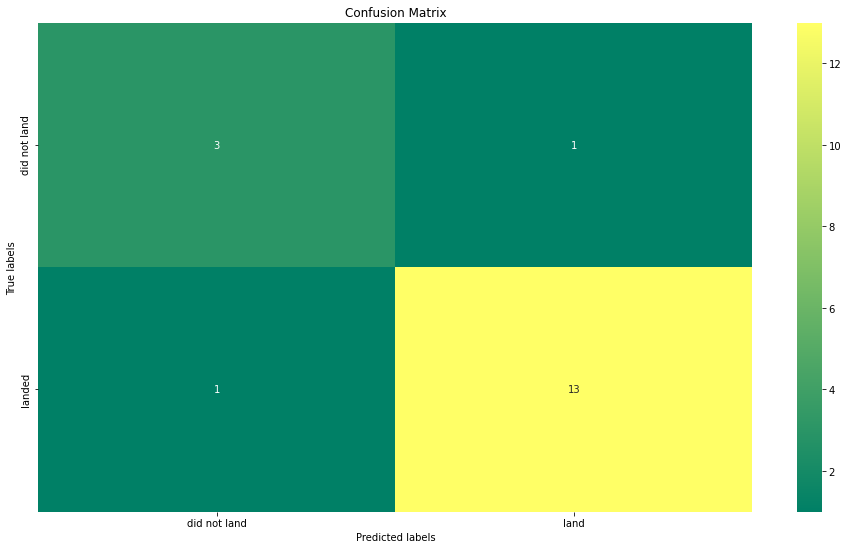

In [7]:
#@title Evaluation #1
print(f'''
Tuned hyperparemetres: The best was, {lore_cv.best_params_}
Accuracy: {round(svm_cv.best_score_, 4)}
Accuracy on test data is: {round(svm_cv.score(X_test, y_test), 4)}
''')

yhat_svm = svm_cv.predict(X_test)
pcm(y_test, yhat_svm)

In [8]:
#@title Fitting for Decision Tree
rn=np.arange(1, 11)
parametres_tree={
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in rn],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree=DecisionTreeClassifier(random_state = rs)

grid_search_tree=GridSearchCV(
    estimator=tree,
    param_grid=parametres_tree,
    scoring='accuracy',
    cv=10
)
tree_cv=grid_search_tree.fit(X_train, y_train)


Tuned hyperparameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Accuracy: 0.875
Accuracy on test data is: 0.8889



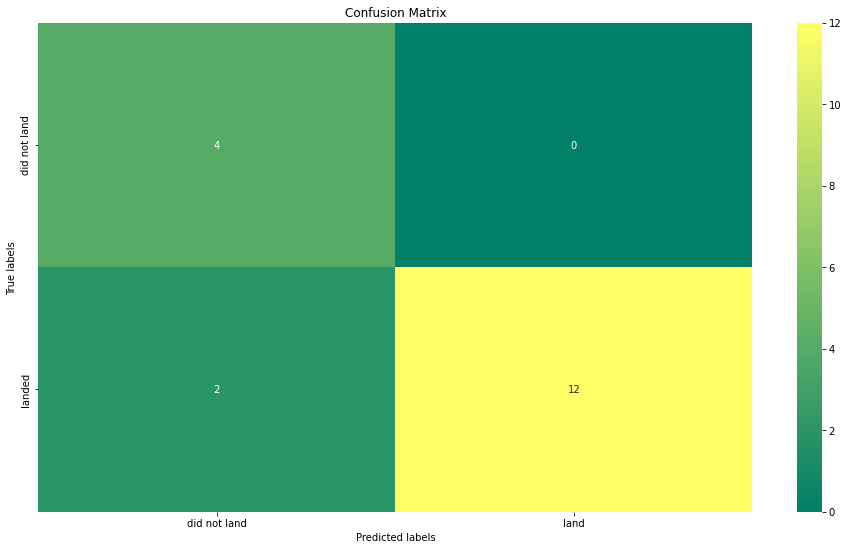

In [9]:
#@title Evaluation #2
print(f'''
Tuned hyperparameters: {tree_cv.best_params_}
Accuracy: {round(tree_cv.best_score_, 4)}
Accuracy on test data is: {round(tree_cv.score(X_test, y_test), 4)}
''')

yhat_tree = tree_cv.predict(X_test)
pcm(y_test, yhat_tree)

In [10]:
#@title Fitting for KNN
parametres_knn = {
    'n_neighbors': list(rn),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2]
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(
    estimator = knn,
    param_grid = parametres_knn,
    scoring = 'accuracy',
    cv = 10
)
knn_cv = grid_search_knn.fit(X_train, y_train)


Tuned hyperparameters: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Accuracy: 0.8446
Accuracy on test data is: 0.9444



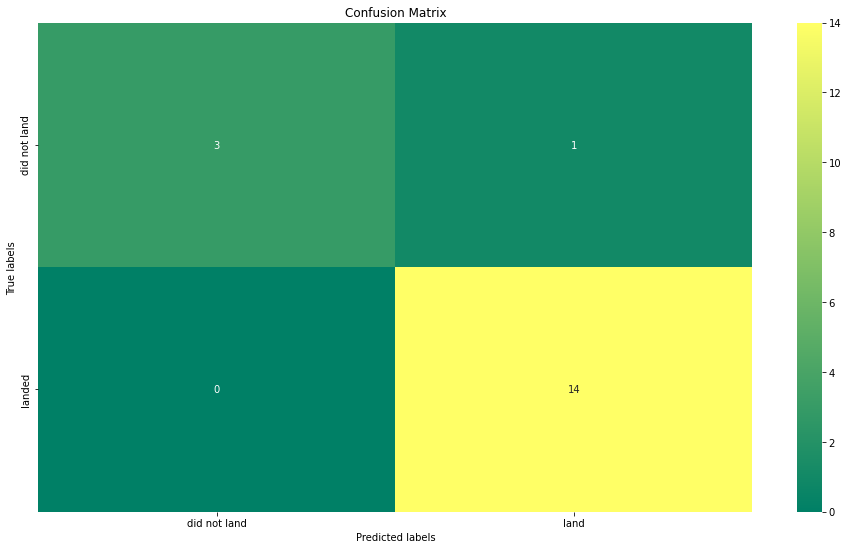

In [11]:
#@title Evaluation #3
print(f'''
Tuned hyperparameters: {knn_cv.best_params_}
Accuracy: {round(knn_cv.best_score_, 4)}
Accuracy on test data is: {round(knn_cv.score(X_test, y_test), 4)}
''')

yhat_knn = knn_cv.predict(X_test)
pcm(y_test, yhat_knn)

In [12]:
#@title Comparison
models={
    'LogisticRegression':lore_cv.best_score_,
    'DecisionTree':tree_cv.best_score_,
    'KNeighbors':knn_cv.best_score_,
    'SupportVector': svm_cv.best_score_
}

bestalgorithm=max(
    models,
    key=models.get
)
print(f'Best model is {bestalgorithm} with a score of {models[bestalgorithm]}\n')
if bestalgorithm == 'DecisionTree':
    print(f'Best parametre is: {tree_cv.best_params_}')
elif bestalgorithm == 'KNeighbors':
    print(f'Best parametre is: {knn_cv.best_params_}')
elif bestalgorithm == 'LogisticRegression':
    print(f'Best parametre is: {lore_cv.best_params_}')
elif bestalgorithm == 'SupportVector':
    print(f'Best parametre is: {svm_cv.best_params_}')

Best model is DecisionTree with a score of 0.875

Best parametre is: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
